In [6]:
import tensorflow as tf

In [7]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_lebals), (test_images, test_lebals) = fashion_mnist.load_data()

In [8]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

assert X_train.shape == (60000,28,28)
assert X_test.shape == (10000,28,28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [9]:
# summarize loaded data

print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


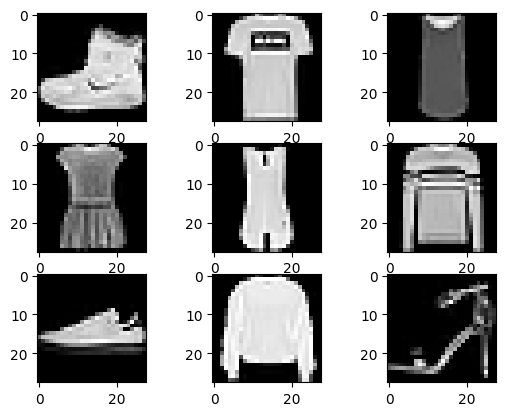

In [10]:
# plot first few images
import matplotlib.pyplot as plt

for i in range(9):
# define subplot
 plt.subplot(330 + 1 + i)
    # plot raw pixel  data
 plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    # show the figure
plt.show()

In [11]:

# preprocess the data or 
X_train = X_train/ 255.0
X_test = X_test/ 255.0


In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax),
])

# comple the modle
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [13]:
# train the model
model.fit(X_train, y_train, epochs=5)

# evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7867 - loss: 0.6151
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8639 - loss: 0.3801
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8775 - loss: 0.3382
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8857 - loss: 0.3132
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8927 - loss: 0.2882
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8744 - loss: 0.3479
Test accuracy: 0.8715999722480774


In [14]:
# train the model
model.fit(X_train, y_train, epochs=10)

# evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8975 - loss: 0.2778
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9000 - loss: 0.2663
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9049 - loss: 0.2535
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9073 - loss: 0.2469
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9117 - loss: 0.2399
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9149 - loss: 0.2276
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9177 - loss: 0.2195
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9211 - loss: 0.2120
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9227 - loss: 0.2052
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9266 - loss: 0.1968
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8788 - loss: 0.3489
Test accuracy: 0.8792999982833862


In [15]:
# pridict the model
predictions = model.predict(X_test)

# print shape of the predicted array
print(predictions.shape)

# print the first predictions
print(predictions[:10])

# convert the predictions to class_labels
class_labels = [tf.argmax(prediction) for prediction in predictions]

# print first 10 class_labels
print(class_labels[:10])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 10)
[[2.20417351e-09 2.19571987e-08 3.98689979e-12 1.01802074e-11
  1.02485209e-09 1.13951457e-04 3.27325084e-10 3.87914799e-04
  3.30858951e-10 9.99498129e-01]
 [6.86610219e-05 7.74234734e-13 9.99722183e-01 2.82955761e-14
  2.04976517e-04 1.23508999e-08 4.14530177e-06 5.90497602e-23
  4.06737664e-12 4.15523469e-18]
 [5.10593789e-10 1.00000000e+00 5.40985103e-14 1.42743639e-09
  7.97402699e-10 1.90783172e-19 1.71464551e-10 1.36717905e-27
  7.83171322e-16 5.21207998e-21]
 [2.94516966e-10 9.99997973e-01 2.99941251e-13 2.06595246e-06
  4.72025299e-08 6.59185762e-16 9.90200455e-09 1.05582145e-23
  2.02146213e-15 3.52286429e-17]
 [1.06865861e-01 3.51483509e-09 4.56128316e-03 6.56197371e-04
  5.51509298e-03 1.65628011e-09 8.82393479e-01 2.79189567e-06
  4.92580239e-06 3.09119486e-07]
 [1.08218164e-05 9.99987841e-01 9.43629246e-08 1.36560075e-07
  1.51284866e-07 1.31788427e-10 9.65759455e-07 4.50843968e-21
  8.59657059e-14 8.28631123e-14]
 [3.9

In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [45]:

# load fashion data 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

c:\Users\Salman\anaconda3\envs\tf_env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7844 - loss: 0.6305 - val_accuracy: 0.8550 - val_loss: 0.4116
Epoch 2/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8587 - loss: 0.3888 - val_accuracy: 0.8748 - val_loss: 0.3485
Epoch 3/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8752 - loss: 0.3426 - val_accuracy: 0.8800 - val_loss: 0.3336
Epoch 4/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8798 - loss: 0.3270 - val_accuracy: 0.8790 - val_loss: 0.3327
Epoch 5/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8894 - loss: 0.3008 - val_accuracy: 0.8800 - val_loss: 0.3263
Epoch 6/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8975 - loss: 0.2788 - val_accuracy: 0.8890 - val_loss: 0.3063
Epoch 7/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8993 - loss: 0.2713 - val_accuracy: 0.8936 - val_loss: 0.2949
Epoch 8/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9045 - loss: 0.2581 - 

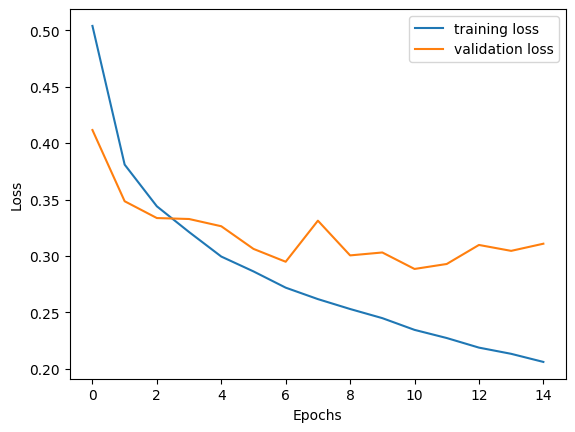

In [46]:



# preprocess the data
x_train = x_train/ 255.0
x_test = x_test/ 255.0

# split the training data into training and validation sets
x_val = x_train[:5000]
y_val = y_train[:5000]
x_train = x_train[5000:]
y_train = y_train[5000:]

# build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

# train the model

history = model.fit(x_train, y_train, epochs=15, validation_data=(x_val, y_val))

# plot the training and validation losses

plt.plot(history.history['loss'], label ='training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

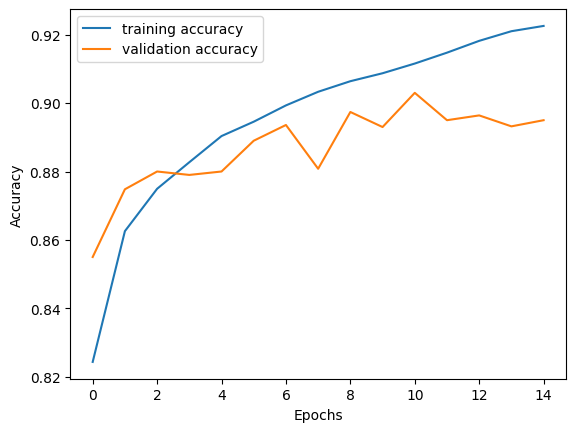

In [47]:
# plot the training and validation accuracy
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [48]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8890 - loss: 0.3525
Test accuracy: 0.8870000243186951
Test loss: 0.34662824869155884
